In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def input_f1(t):
    return np.sin(t*t - 6*t + 3)

def input_f2(t):
    return np.sin(np.sin(t) * t*t)

def get_t(a, b, h):
    return np.arange(a, b, h)

def output_f(t):
    return 1/4 * np.sin(np.sin(t) * t*t - np.pi)

In [3]:
h1 = 0.025
h2 = 0.01

t1 = get_t(0, 5, h1)
t2 = get_t(0, 3.5, h2)

x1 = input_f1(t1)
x2 = input_f2(t2)

y1 = output_f(t1)
y2 = output_f(t2)

In [4]:
def Adaline(target, epochs, delay, learningRate):
    weights = np.random.sample(delay)
    bias = np.random.random()
    out = np.zeros(target.size)
    errMin = 10**(-10)
    err = 99999
    errors = []

    for epoch in range(epochs):
        if err < errMin:
            for i in range(len(target) - delay):
                x = np.array([target[i + j] for j in range(delay)], dtype=np.float32)
                out[i + delay] = np.dot(x, weights) + bias
            break
        else:
            err = 0
            for i in range(len(target) - delay):
                x = np.array([target[i + j] for j in range(delay)], dtype=np.float32)
                out[i + delay] = np.dot(x, weights) + bias
                err = (target[i + delay] - out[i + delay])
                errors.append(err * err)
                weights += learningRate * np.dot(x, err)
                bias += learningRate * err
        if (learningRate > 10**(-6)):
            learningRate -= 0.0001
    return weights, out, sum(errors) / len(errors)

## Задание 1

Используем линейную нейронную сеть Adaline с задержками для аппроксимации функции.

In [5]:
delay = 5
learningRate = 0.01
epochs = 50

In [6]:
w1, out, error = Adaline(x1, epochs, delay, learningRate)

In [7]:
print('MSE = {}'.format(round(error, 5)))
print('RMSE = {}'.format(round(np.sqrt(error), 5)))

MSE = 0.05642
RMSE = 0.23753


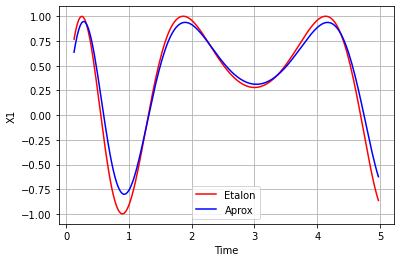

In [8]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X1')
plt.plot(t1[delay:], x1[delay:], 'r', label='Etalon')
plt.plot(t1[delay:], out[delay:], 'b', label='Aprox')
plt.legend()

## Задание 2

Используем линейную нейронную сеть Adaline с задержками для аппроксимации функции и выполнения многошагового прогноза.

In [9]:
delay = 3
learningRate = 0.01
epochs = 600

In [10]:
w2, out2, error2 = Adaline(x1, epochs, delay, learningRate)

In [11]:
print('Error = {}'.format(round(error2, 5)))

Error = 0.03891


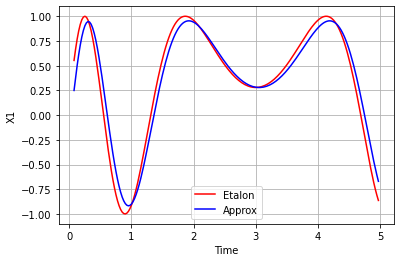

In [12]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X1')
plt.plot(t1[delay:], x1[delay:], 'r', label='Etalon')
plt.plot(t1[delay:], out2[delay:], 'b', label='Approx')
plt.legend()

Многошаговый прогноз

In [13]:
test_time = get_t(5, 5 + 10 * h1, h1)
target_x = input_f1(test_time)

In [14]:
w2_, out2_, error2_ = Adaline(target_x, epochs, delay, learningRate)

In [15]:
print('Error = {}'.format(round(error2_, 5)))

Error = 0.23096


## Задание 3

Используем линейную нейронную сеть Adaline в качестве адаптивного фильтра для подавления помех.

In [16]:
delay = 4
learningRate = 0.0055
epochs = 60

In [17]:
w3, out3, error3 = Adaline(x2, epochs, delay, learningRate)

In [18]:
print('Error = {}'.format(round(error3, 5)))


Error = 0.00439


In [20]:
print('RMSE Error = {}'.format(np.sqrt(0.00439)))

RMSE Error = 0.06625707509390978


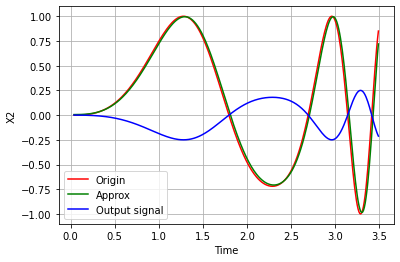

In [19]:
plt.grid(True)
plt.xlabel('Time')
plt.ylabel('X2')
plt.plot(t2[delay:], x2[delay:], 'r', label='Origin')
plt.plot(t2[delay:], out3[delay:], 'g', label='Approx')
plt.plot(t2[delay:], y2[delay:], 'b', label='Output signal')
plt.legend()